<a href="https://colab.research.google.com/github/EthanSonenshine/NEUR-3002/blob/main/ica_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

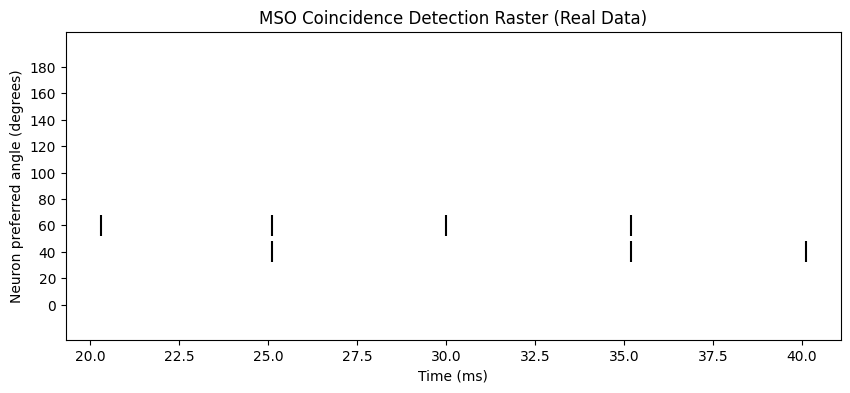

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Neuron array (preferred angles)
# ----------------------------
neuron_angles = np.array([0, 20, 40, 60, 80, 100, 120, 140, 160, 180])
n_neurons = len(neuron_angles)

# ----------------------------
# Simulation parameters
# ----------------------------
dt = 0.1  # ms
T = 100   # total time
time = np.arange(0, T, dt)

# ----------------------------
# Input real spike data here
# ----------------------------
# Example: replace these arrays with actual recorded spike times
left_spikes = np.array([20.3, 25.1, 30.0, 35.2, 40.1])   # ms
right_spikes = left_spikes + 1.8                          # ms, ITD measured from experiment

# ----------------------------
# Neuron properties
# ----------------------------
max_itd = 3
preferred_delays = max_itd * np.cos(np.deg2rad(neuron_angles))
sigma = 0.5                  # tuning width (ms) for population coding
coincidence_window = 0.5      # ms

# ----------------------------
# Generate spikes for raster
# ----------------------------
neuron_spike_times = [[] for _ in range(n_neurons)]

for n, pd in enumerate(preferred_delays):
    for ls, rs in zip(left_spikes, right_spikes):
        delta_itd = rs - ls - pd
        prob = np.exp(-(delta_itd)**2 / (2*sigma**2))
        if np.random.rand() < prob:
            neuron_spike_times[n].append(ls)  # spike occurs at left spike time

# ----------------------------
# Raster plot using eventplot
# ----------------------------
plt.figure(figsize=(10,4))
plt.eventplot(neuron_spike_times, colors='black', lineoffsets=np.arange(n_neurons), linelengths=0.8)
plt.xlabel("Time (ms)")
plt.ylabel("Neuron preferred angle (degrees)")
plt.title("MSO Coincidence Detection Raster (Real Data)")
plt.yticks(np.arange(n_neurons), neuron_angles)
plt.show()
